In [94]:
import pandas as pd
from scipy.stats import zscore

#### Load the data

In [95]:
data = pd.read_csv("cleaned_data.csv")
data.head()

,student_id,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,student_0,14.0,20.0,0.0,11.0,2.0,1,2.0,4.0,2.0,...,2.0,3.0,2.0,3.0,3,2.0,3.0,3.0,2.0,1.0
1,student_1,15.0,8.0,1.0,15.0,5.0,3,1.0,4.0,3.0,...,2.0,1.0,4.0,1.0,5,1.0,4.0,5.0,5.0,2.0
2,student_2,12.0,18.0,1.0,14.0,2.0,1,2.0,2.0,2.0,...,2.0,2.0,3.0,3.0,2,2.0,3.0,2.0,2.0,1.0
3,student_3,16.0,12.0,1.0,15.0,4.0,3,1.0,3.0,4.0,...,2.0,2.0,4.0,1.0,4,1.0,4.0,4.0,5.0,2.0
4,student_4,16.0,28.0,0.0,7.0,2.0,3,5.0,1.0,3.0,...,3.0,4.0,3.0,1.0,2,1.0,5.0,0.0,5.0,1.0


# Step 1: Missing values

##### check if missing values exist. if yes, replace them with the mean data

In [96]:
missing_values = data.isnull().sum()

### Before handling missing values

In [97]:
missing_values

student_id                      0
anxiety_level                   1
self_esteem                     3
mental_health_history           1
depression                      3
headache                        1
blood_pressure                  0
sleep_quality                   1
breathing_problem               1
noise_level                     3
living_conditions               4
safety                          1
basic_needs                     1
academic_performance            1
study_load                      1
teacher_student_relationship    1
future_career_concerns          0
social_support                  2
peer_pressure                   2
extracurricular_activities      1
bullying                        2
stress_level                    2
dtype: int64

##### For the first column, since the data type isn't integer, we can't replace it with the mean. rather we give it a unique identifier

In [98]:
if data.iloc[:, 0].isnull().any():
    last_index = data.index[-1]
    data.iloc[:, 0].fillna(f'student_unknown_{last_index}', inplace=True)

##### For numeric columns, we replace null values with the data mean

In [99]:
numeric_columns = data.select_dtypes(include='number').columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

##### Check if all missing values are filled

In [100]:
data.isnull().sum()

student_id                      0
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

# Step 2: Outliers

#### Identify and handle outliers using Z-scores

In [101]:
import numpy as np

In [102]:
column_name = "self_esteem"

### Before handling outliers

In [108]:
print(data[column_name].describe())

count    1100.000000
mean       17.906392
std         9.415475
min         0.000000
25%        11.000000
50%        19.000000
75%        26.000000
max       112.000000
Name: self_esteem, dtype: float64


<AxesSubplot:xlabel='student_id', ylabel='self_esteem'>

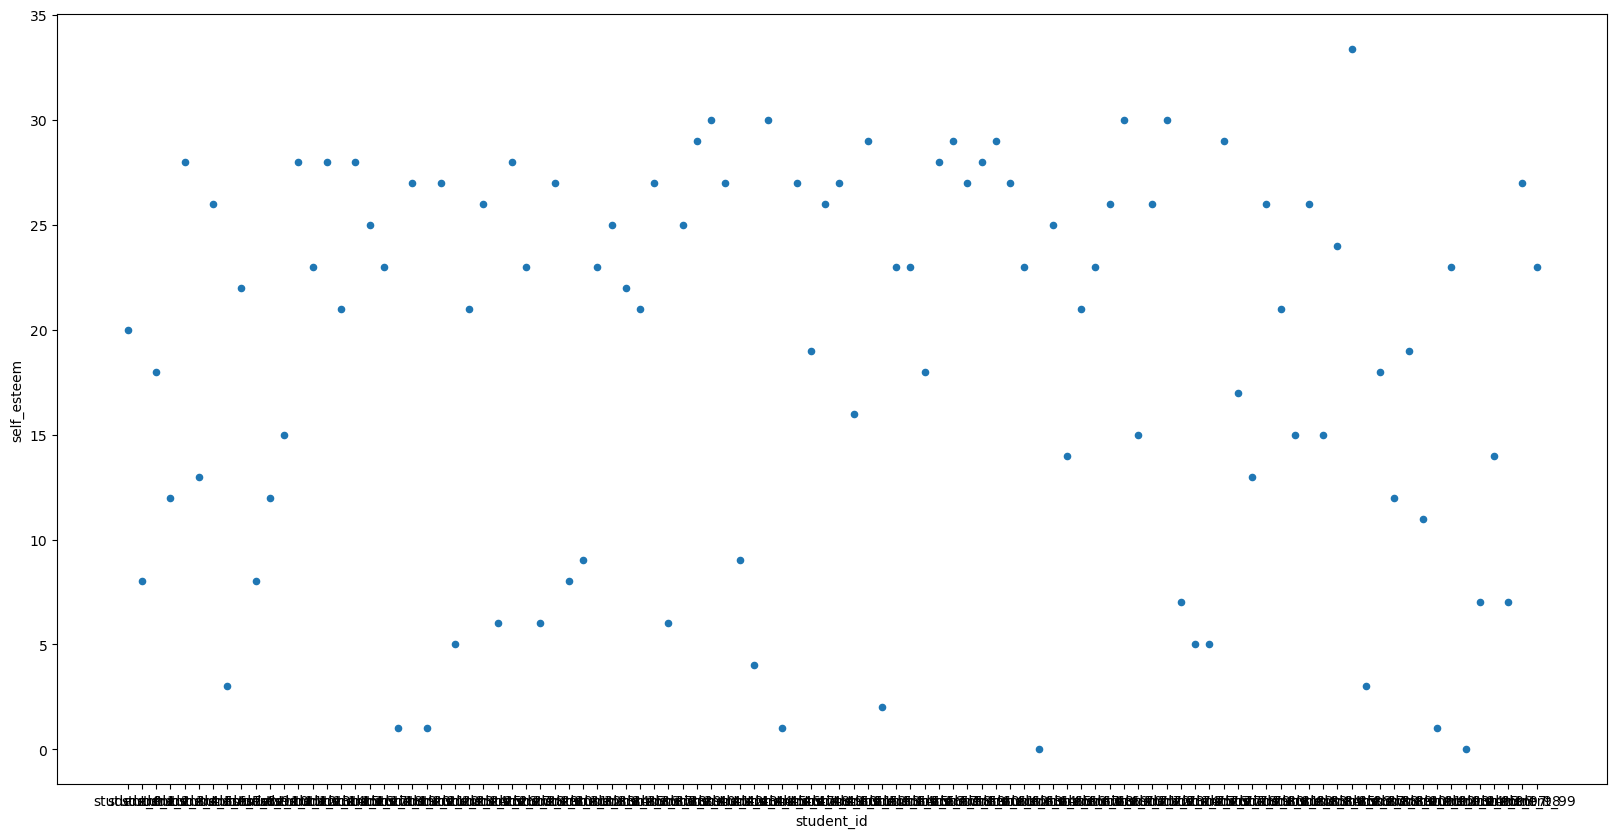

In [109]:
data.head(100)[["student_id",column_name]].plot(kind='scatter', x='student_id', y=column_name, figsize=(20, 10))

#### Calculate the Z_Score

In [104]:
z_scores = np.abs(zscore(data[numeric_columns], axis=0))
z_scores.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,0.479700,0.026068,0.636387,0.201464,0.361015,1.418416,0.427645,0.891343,0.486888,0.429982,...,0.441830,0.126931,0.362662,0.056979,0.220748,0.039128,0.187015,0.163230,0.403101,0.011113
1,0.643271,0.049511,0.559150,0.317634,1.727172,0.981981,1.074112,0.891343,0.268580,1.358483,...,0.441830,1.141222,0.741397,0.426570,1.512360,0.497899,0.890241,1.575744,1.558221,1.005726
2,0.152557,0.029975,0.559150,0.187859,0.361015,1.418416,0.427645,0.537666,0.486888,0.464250,...,0.441830,0.507146,0.189368,0.056979,0.425058,0.039128,0.187015,0.543028,0.403101,0.011113
3,0.806842,0.041696,0.559150,0.317634,1.031110,0.981981,1.074112,0.176838,1.024048,0.464250,...,0.441830,0.507146,0.741397,0.426570,0.866554,0.497899,0.890241,0.869487,1.558221,1.005726
4,0.806842,0.010439,0.636387,0.720562,0.361015,0.981981,1.511757,1.252171,0.268580,0.464250,...,0.108081,0.761007,0.189368,0.426570,0.425058,0.497899,1.593467,1.955542,1.558221,0.011113


#### Identify the outliers from the Z_Index

In [105]:
threshold = 2
outliers = np.where(np.abs(z_scores) > threshold)[0]
print("Indices of outliers:", outliers)

Indices of outliers: [   9   17  114  125  184  201  204  220  259  274  278  286  290  295
  312  313  320  339  344  360  384  393  403  405  437  449  451  475
  488  493  511  514  516  520  521  558  571  575  577  583  589  592
  607  648  649  675  745  747  752  791  809  815  825  828  829  857
  859  861  865  884  887  919  922  946  984  989 1005 1026 1033 1037
 1040 1053 1065 1095 1095 1099]


#### Replace the outliers with the median value

In [106]:
data[numeric_columns] = np.where(np.abs(z_scores) > threshold, data[numeric_columns].median(), data[numeric_columns])

#### After handling outliers

In [107]:
print(data[column_name].describe())

count    1100.000000
mean       17.906392
std         9.415475
min         0.000000
25%        11.000000
50%        19.000000
75%        26.000000
max       112.000000
Name: self_esteem, dtype: float64


<AxesSubplot:xlabel='student_id', ylabel='self_esteem'>

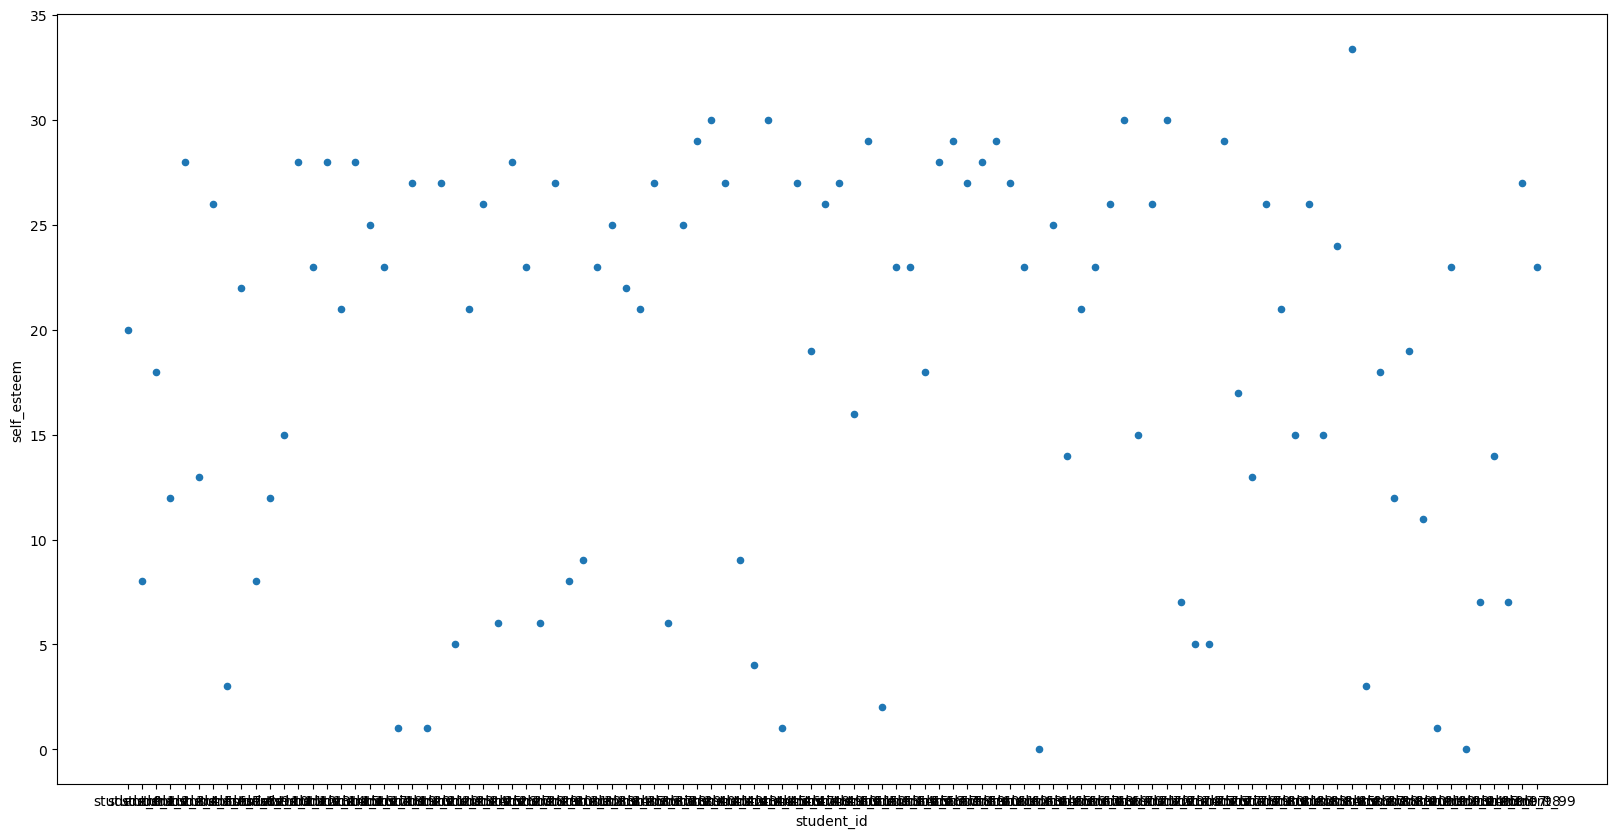

In [110]:
data.head(100)[["student_id",column_name]].plot(kind='scatter', x='student_id', y=column_name, figsize=(20, 10))

In [115]:
data.to_csv("outliers_handled.csv", index=False)